C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23520\268453212.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('risk_group')['CACS_binary'].agg(['count', 'sum'])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23520\268453212.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_stats.index, y=group_stats['rate'], palette='coolwarm', alpha=0.8)


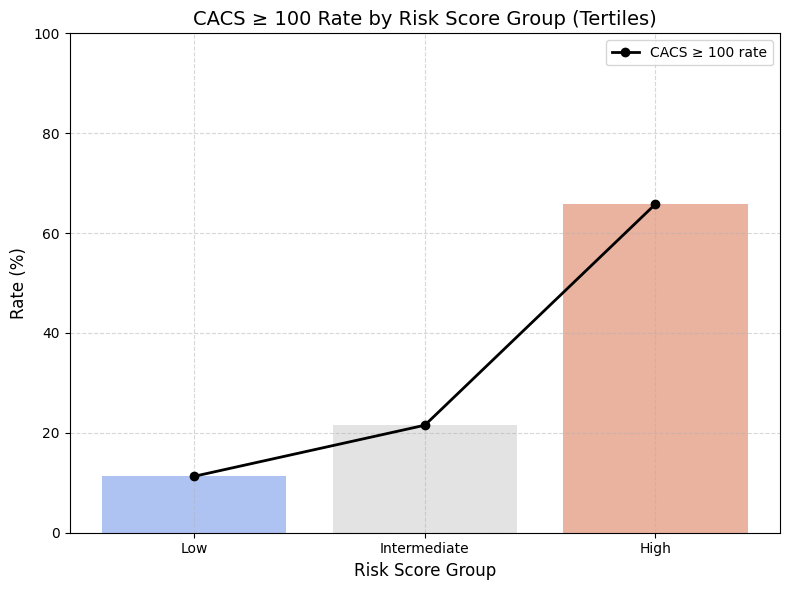

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 불러오기
df = pd.read_excel("CACS_risk_score_output.xlsx")

# 2. Tertile 기준으로 risk group 나누기
df['risk_group'] = pd.qcut(df['risk_score'], q=3, labels=['Low', 'Intermediate', 'High'])

# 3. 그룹별 CACS ≥ 100 발생률 계산
group_stats = df.groupby('risk_group')['CACS_binary'].agg(['count', 'sum'])
group_stats['rate'] = group_stats['sum'] / group_stats['count'] * 100  # 퍼센트로 환산

# 4. 시각화
plt.figure(figsize=(8, 6))

# Barplot (막대그래프)
sns.barplot(x=group_stats.index, y=group_stats['rate'], palette='coolwarm', alpha=0.8)

# 선그래프 추가
plt.plot(group_stats.index, group_stats['rate'], marker='o', color='black', linewidth=2, label='CACS ≥ 100 rate')

# 그래프 스타일
plt.ylim(0, 100)
plt.title("CACS ≥ 100 Rate by Risk Score Group (Tertiles)", fontsize=14)
plt.ylabel("Rate (%)", fontsize=12)
plt.xlabel("Risk Score Group", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# 5. 저장
plt.savefig("Risk_Group_CACS_Rate.png", dpi=300)
plt.savefig("Risk_Group_CACS_Rate.pdf", dpi=300)

plt.show()
